In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re
from tqdm import tqdm


In [2]:
df = pd.read_csv('dataset/1.csv')

In [3]:
df

,numStars,dateOfReviewStr,headline,mainReview,helpfulness
0,5.0,"November 2, 2021",Wonderful,Always look forward to coming here. It's busy ...,1
1,5.0,"June 21, 2021",Best Japanese Restaurant in California,We have been to many Japanese restaurants in C...,43
2,5.0,"February 19, 2021",Congratulations,This a great placer for a good date It is one ...,1
3,5.0,"November 8, 2020",This place was amazing!,"The place is clean, decent, with high ceilings...",2
4,5.0,"October 22, 2020",Amazing ambiance,The fascinating ambiance that breaks you to Ko...,0
...,...,...,...,...,...
143,5.0,"November 5, 2012",Just Remarkable/Best Meal of my Life,My wife says its almost like Gordon Ramsey's i...,1
144,5.0,"November 5, 2012","First of all, it's n/naka NOT N/Nako",http://www.n-naka.com/. Terrific restaurant. S...,0
145,5.0,"October 4, 2012","A combination of freshness, elegance, sophisti...",I recently enjoyed the 13 course tasting menu ...,0
146,5.0,"August 26, 2012",N/Naka is Superb!,"Ate at N/Naka for the first time, it was every...",3


In [4]:
# Tokenize by Spacing
df['mainReview'].loc[0].split(' ')

['Always',
 'look',
 'forward',
 'to',
 'coming',
 'here.',
 "It's",
 'busy',
 'for',
 'a',
 'reason.',
 'Staff',
 'are',
 'friendly',
 'and',
 'the',
 'food',
 'is',
 'excellent.',
 'Hard',
 'to',
 'beat!']

In [5]:
# Tokenize by 
from tensorflow.keras.preprocessing.text import text_to_word_sequence
text_to_word_sequence(df['mainReview'].loc[0])

['always',
 'look',
 'forward',
 'to',
 'coming',
 'here',
 "it's",
 'busy',
 'for',
 'a',
 'reason',
 'staff',
 'are',
 'friendly',
 'and',
 'the',
 'food',
 'is',
 'excellent',
 'hard',
 'to',
 'beat']

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanbikim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords

In [8]:
stop_words_list = stopwords.words('english')
len(stop_words_list)

179

In [9]:
# To add another stopwords
stop_words_list.append('n')

In [10]:
total_word = []
for review in df['mainReview']:
    for word in text_to_word_sequence(review):
        if word not in stop_words_list:
            total_word.append(word)

In [11]:
from collections import Counter

In [12]:
Counter(total_word).most_common(10)

[('food', 61),
 ('experience', 47),
 ('restaurant', 42),
 ('naka', 41),
 ('service', 34),
 ('every', 31),
 ('amazing', 30),
 ('chef', 30),
 ('one', 29),
 ('course', 29)]

In [13]:
# Type: List
Counter(total_word).most_common(10)[0][1]

61

## Wordcloud

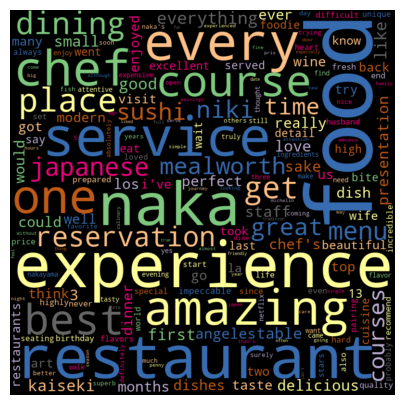

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    background_color='black',
    colormap = 'Accent',   
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(dict(Counter(total_word).most_common()))
array = wordcloud_words.to_array()

fig = plt.figure(figsize=(5, 5))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()

## N-gram

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
doc = ' '.join(df['mainReview'])

In [17]:
n_gram_range = (3, 3)
stop_words = "english"

count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([doc])
candidates = count.get_feature_names_out()

In [18]:
candidates

array(['10 months ate', '10 tables cozy', '10am start trying', ...,
       'yuna sorry wrote', 'zen sign outside', 'zone clean gray'],
      dtype=object)

In [19]:
total_word = []
for c in candidates:
    for word in c.split(' '):
        if word != 'amazing':
            total_word.append(word)

In [20]:
Counter(total_word).most_common(10)

[('food', 180),
 ('naka', 139),
 ('experience', 138),
 ('restaurant', 124),
 ('chef', 122),
 ('service', 99),
 ('course', 83),
 ('best', 81),
 ('place', 78),
 ('dining', 71)]